In [12]:
# link to the dataset: https://www.kaggle.com/datasets/dolphin123456789/iris-csv/data

# we Load data Iris flowers from a file.
# and then Select specific flower measurements like Sepal & Petal length/width and and put them into a new container (X) for easier access
# then selecting just the "Species" column and putting it in a separate container (y).

import pandas as pd
Iris = pd.read_csv("Iris.csv")
X = Iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=Iris.Species


In [13]:
# Getting to know the data better by exploring it and also viweing the first 5 rows of data to see how it looks.
# The data has 150 entries, like 150 different Iris flowers.
# There are 6 columns: ID, Sepal Length, Sepal Width, Petal Length, Petal Width, and Species.
# All columns have complete information there are no missing values

Iris.info()
Iris.describe()
Iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


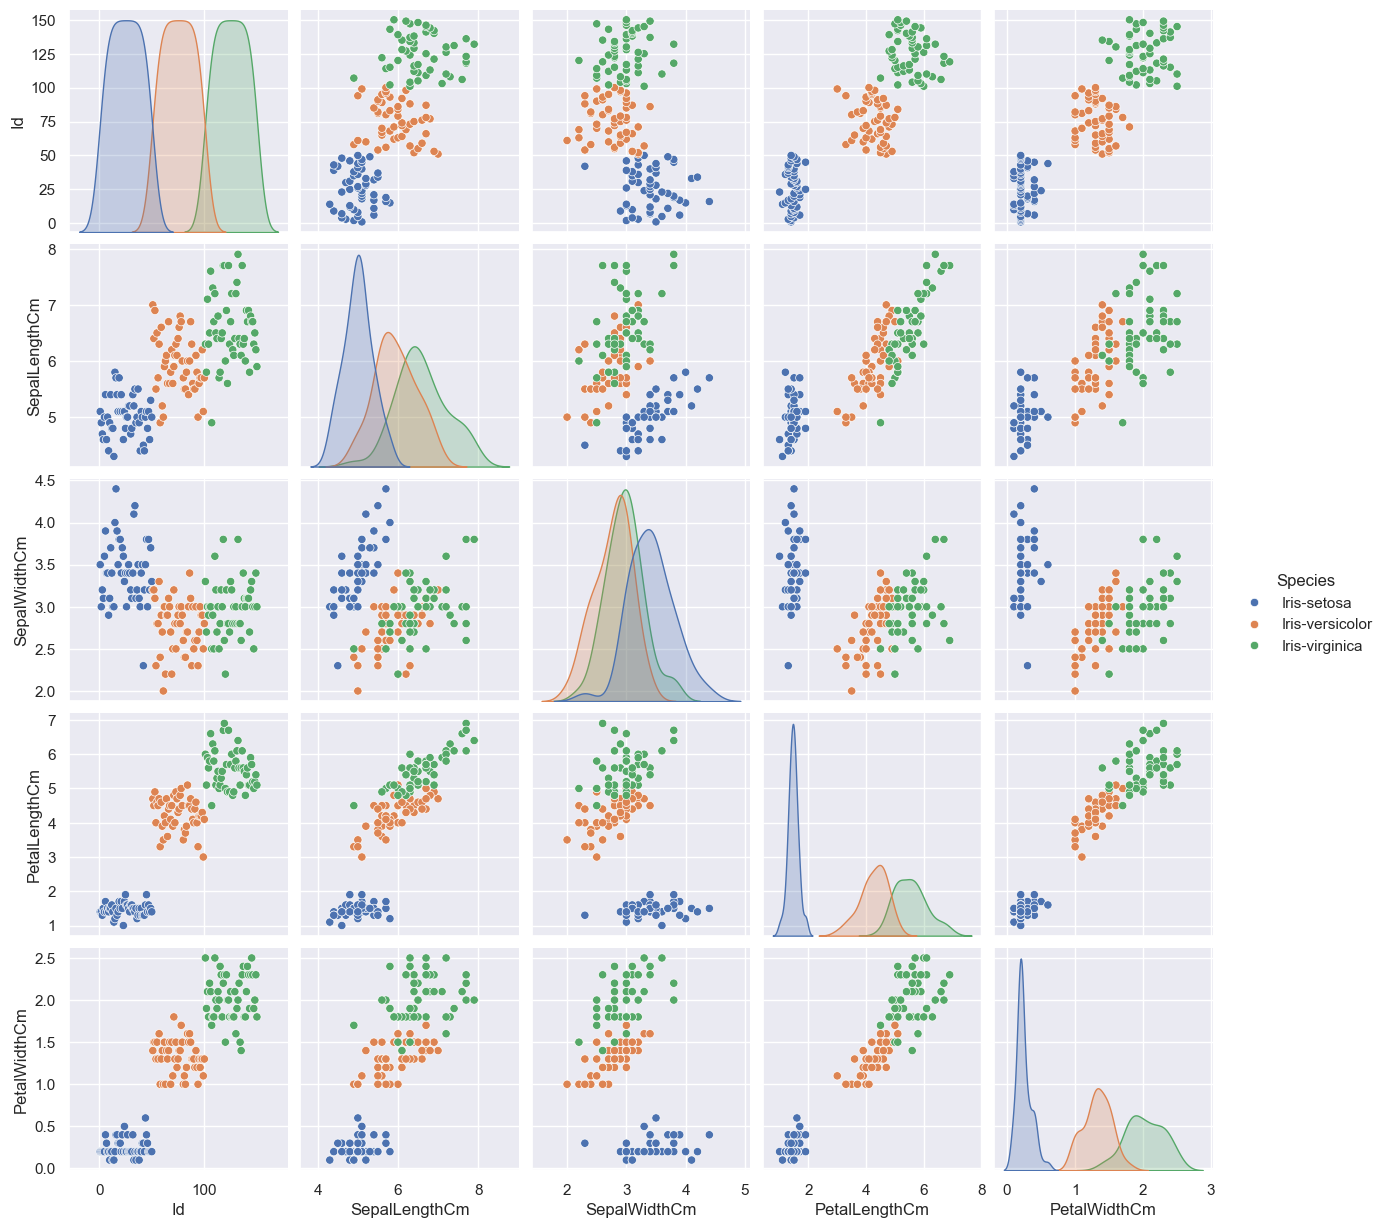

In [14]:
# This code gives a grid of mini-charts called pair plots. Each mini-chart shows the relationship between twodifferent features (columns) in the data.
# from the output we can say that there is a strong relationship in between the three species of iris when it comes to sepal length and sepal width but not as much with other features.
# also that the species iris versicolor and iris virginica have strong relationship when it comes to sepal and petal length across width.

p=sns.pairplot(Iris, hue = 'Species')

In [15]:
# we standardize the data as it helps some models work better because they can focus on the relationships between features rather than being distracted by different scales.
# The scaler adjusts the data so that each feature like sepal length, petal width has a similar range of values.


from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [16]:
# Inorder to understand how the different flower measurements are related to each other. we calculate a covriace matrix which means
# Covariance tells us how much two features of the flower tend to change together.
# from the matrix obtained we can observe that,
# Positive values like 0.8776, 0.8234 etc., indicate that the features tend to increase or decrease together.
# Negative values like -0.1101, -0.4233 etc., indicate that the features tend to move in opposite directions.
# but if Values are closer to zero that means those features have weaker relationships.

import numpy as np

X_mean = np.mean(X, axis=0)
# cov_mat = np.cov(X)
cov_mat = (X - X_mean).T.dot((X - X_mean)) / (X.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [25]:
# As now we know how features relate to eachother but now we try to find principal roads that capture the most significant variations in the data like directions in the map.
# In the output, we see Each eigenvector is a column like there are as many eigenvectors as there are features in this case, 4 columns across 4 rows as there is 4 flower measurements.
# The eigen values tell us how much spread each eigenvector is. larger the eigenvalue, better is the eigenvector in capturing the variations in the data.

# Here in the output , the first eigenvector that is the first column in eig_vecs has the largest eigenvalue 2.93, hence it detects the most important variation in the data.
# The remaining eigenvectors and their corresponding eigenvalues have smaller values, indicating they detect less variation.

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [18]:
# The eigenvectors only define the directions of the new axis, since they all have the same unit length 1.
# In order to decide which eigenvectors can be dropped without losing too much information,
# we need to check the eigen values. The eigenvectors with the lowest eigen values contain the least information about the distribution of the data.
# those are the ones that can be dropped.


eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9303537755893148
0.9274036215173416
0.1483422264816399
0.02074601399559592


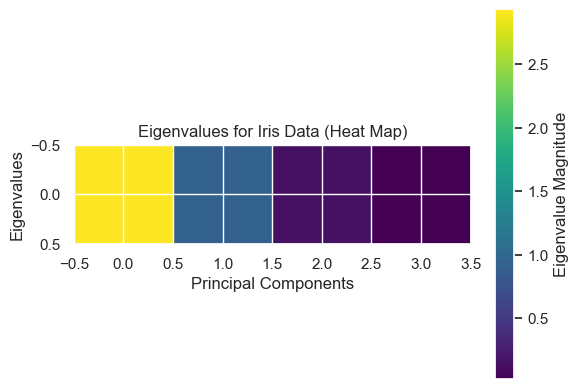

In [20]:
# we now visualize the eigen values on a heatmap 
# This helps in seeing which principal components capture the most significant variations in the Iris flower data.
# here yellow correspond to higher eigenvalue values, indicating more important clutter patterns.


eigenvalues = np.array([pair[0] for pair in eig_pairs])

eigenvalues_2d = eigenvalues.reshape((1, eigenvalues.shape[0]))

plt.imshow(eigenvalues_2d, cmap='viridis', interpolation='nearest')

plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues for Iris Data (Heat Map)')

plt.colorbar(label='Eigenvalue Magnitude') 
plt.show()



[ 72.77045209  95.80097536  99.48480732 100.        ]


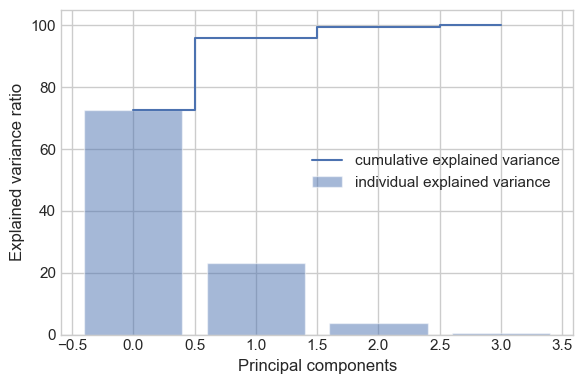

In [27]:
#Explained variance
#Inorder to know how many eigen vectors or principal components we are going to choose, the below code will tell us,
# how much information can be associated to each of the principal components. 
# The plot below clearly shows that most of the variance of 72.77%  can be explained by the first principal component alone. 
# The second principal component still bears some information 23.03% . 
# while the third and fourth principal components can be dropped without losing to much information. 
# Together, the first two principal components contain 95.8% of the information.


tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)


with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [22]:
# Here we choose the top 2  eigenvectorsas as we discussed above with the highest information to construct 2-dimensional eigenvector matrix .

matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [23]:
# This code mixes the data points based on the features' weights.

Y = X.dot(matrix_w)

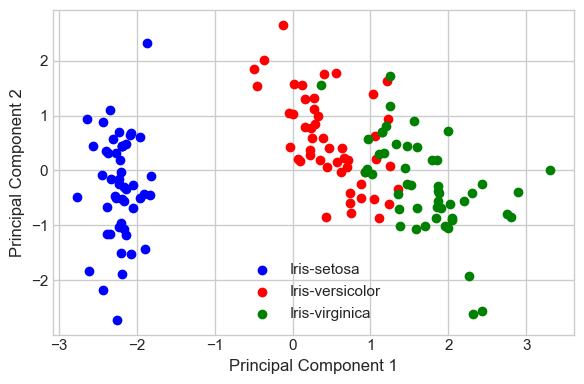

In [28]:
# Visulaization of PCA 
# From the plot we can observe that the PCs effectively capture the variations that distinguish the Iris species, Iris setosa from rest other two species.
# but there is not a clear variation captured between iris versicolor and iris virginica.

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0], Y[y==lab, 1], label=lab, c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [ ]:
Reference links:

# https://www.kaggle.com/code/zouhirmkns/pca-for-dimensionality-reduction
# https://github.com/evrial/PCA-dimensionality-reduction/blob/master/pca_exercise.ipynb
# https://github.com/KhyatiMahendru/Dimensionality-Reduction/blob/master/DimensionalityReduction.ipynb
# https://github.com/eggie5/ipython-notebooks/blob/master/pca/Dimensionality%20Reduction%20using%20PCA.ipynb